# Analyse de données - Spotify

Après divers observations j'ai décidé d'utiliser principalement le fichier tracks.csv\
Ma problématique est :\
Les critères de popularités qui permettrai à un(e) jeune artiste "touche à tout" d'orienter sa direction artistique.

L'approche :
- Observation initial du fichier
    - Type de données présentes
    - Réalisation d'une matrice de correlation afin d'avoir de nous orienter sur les caratéristiques que l'on va exploiter
- Production de données 
    - 1 diagramme avec données continues, type nuage de point ou histogramme
    - 2 diagrammes avec des données discrètes
    - 3 graphiques avec des données catégoriques
    - 1 boîte à moustaches
    - 1 heat map avec matrice de corrélation
- Conclusion

## Import des librairies, fichiers et premières observations de datasets

In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
spotify_tracks = pd.read_csv('./datasets/spotify/tracks.csv');
spotify_by_year = pd.read_csv('./datasets/spotify/data_by_year_o.csv');
spotify_genres = pd.read_csv('./datasets/spotify/data_by_genres_o.csv');

Notre population sera 586 672 éléments, ayant 20 caratéristiques.  
Regardons les différents caractéristiques présentent dans notre dataset afin de savoir celles qui pourront apparaître dans notre matrice de correlation.

In [4]:
spotify_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Au vu de la problématique l'utilisation du 'popularity' est évidante, cette caractéristique sera notre référence principale afin de répondre à notre problématique.

In [5]:
spotify_tracks["popularity"].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

On peut obverver un moyenne de 27.570053, associé à une variance de 18.370642 on pourrait avancer que la moyenne n'est pas représentative.
En regardant les quartiles on peut observer que la médianne (le 50% dans la cellule au dessus) se situe autour de 27 ce que est à 0.570053 notre moyenne. 
On voit aussi que 75% de notre population se situe entre 0 et 41.

### Observont visuellement les données fournis par le discribe avec un graphique de distribution

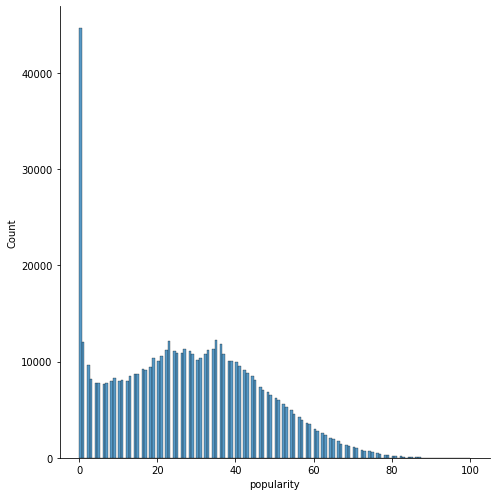

In [6]:
sns.displot(spotify_tracks["popularity"], height=7)

La matrice de distribution nous permet d'observer qu'une grande population à une population de 0.
On pourrait se poser des questions:
- Notre population ayant une population de 0 post-elle de la musique? Si oui combien de titre à t-elle posté en moyenne tout en veillant à la représentativité de cette moyenne avec la variance ?
- Y a t-il des correlations se rapprochant 1 entre certaines caractéristiques de notre dataset et cette population de 0?

Cette ensemble de questions nous les orienterons vers les 25% de notre population ayant une popularité supérieur à 41 afin d'avoir selon moi, des données plus représentatives.

In [7]:
spotify_tracks = spotify_tracks[spotify_tracks.popularity > 41];

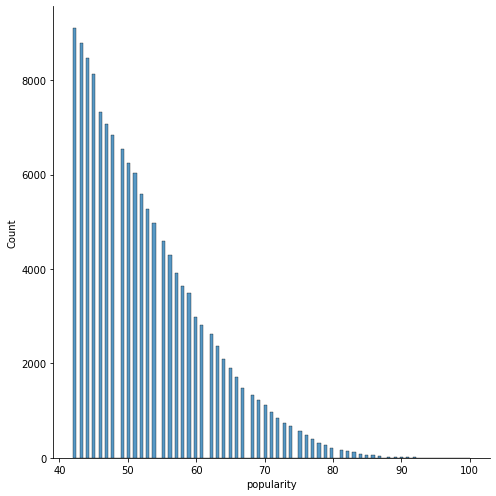

In [8]:
sns.displot(spotify_tracks["popularity"], height=7)

À présent voyons la matrice de la matrice de correlation en ne prenant que les caractéristiques ayant un datatype numériques (int et float)

<AxesSubplot:>

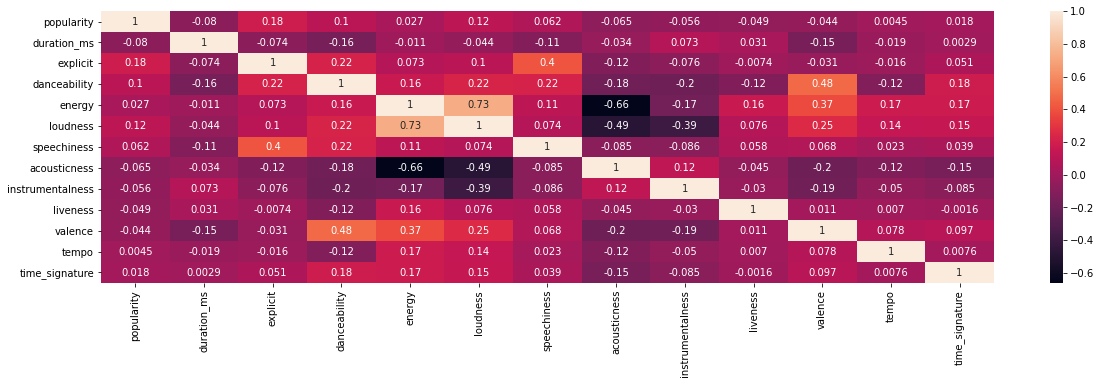

In [14]:
#spotify_tracks = spotify_tracks.iloc[:,[2,3,4,8,9,11,13,14,15,16,17,18,19]]; 
corr = spotify_tracks.iloc[:,[2,3,4,8,9,11,13,14,15,16,17,18,19]].corr()
f, ax = plt.subplots(figsize=(20,5))
sns.heatmap(corr, annot=True, ax =ax)

À partir de cette matrice qui concerne les 25% de notre population initial on peut observer plusieurs éléments sur la categorie 'popularity'.
Les correlations toutes proches de zeros.
Cette observation sera mis en avant lors de la conclusion.

On va s'attader sur les caractériques 3 caractéristique ayant la corrélation la plus élevé avec 'popularity' soit:
'explicit', 'danceability' et 'loudness'
Par soucis de lisibilité des graphs nous prendront un échantillon de 300 éléments

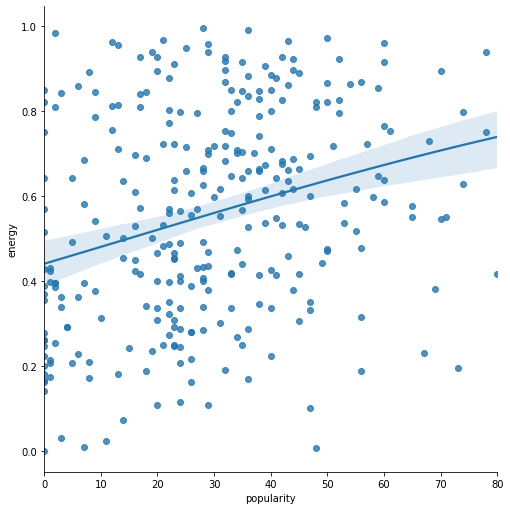

In [129]:
sns.lmplot(x="popularity", y="energy", data=spotify_tracks.sample(300), logistic=True, height= 7)

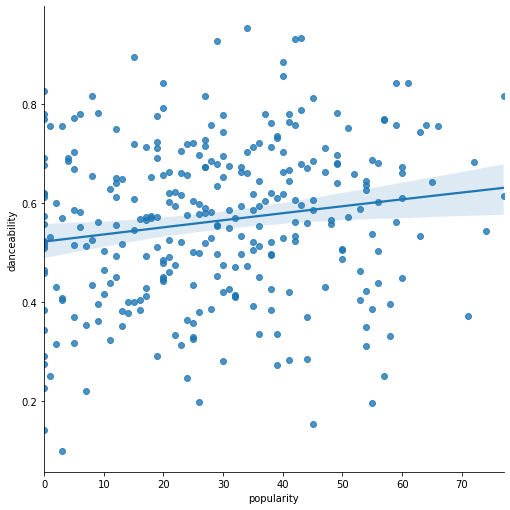

In [128]:
sns.lmplot(x="popularity", y="danceability", data=spotify_tracks.sample(300), logistic=True, height= 7)

Les graphs proposés ne sont pas représentatives car les variances sont significatives.

<AxesSubplot:xlabel='explicit', ylabel='popularity'>

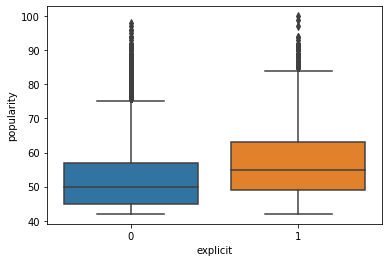

In [15]:
sns.boxplot(x="explicit", y="popularity", data=spotify_tracks)

La donnée observée présente des données absurdes, cepandant selon moi il est préférable de les garder afin que l'artiste et son entourage ai l'opportunité de tiré leurs conclusions avec une donnée que je trouve représentive l'industrie de la musique.
Le graphique ci-dessus n'étant pas très lisible. Nous voir les mêmes données via une régression linéaire.

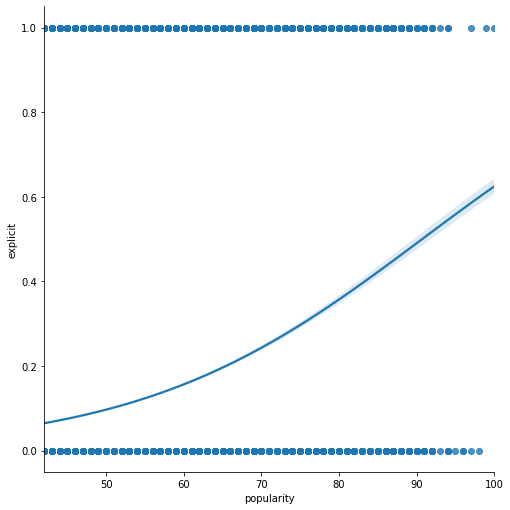

In [21]:
sns.lmplot(x="popularity", y="explicit", data=spotify_tracks, logistic=True, height= 7)

On peut observer une tendance croisante net, à nuancer tout de même car bien que faible, la variance croit aussi.  

## Observations de la répartission de la popularité des genres musicaux

In [78]:
spotify_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [60]:
spotify_genres.popularity.describe()

count    2973.000000
mean       39.919185
std        16.748723
min         0.000000
25%        32.491279
50%        43.056569
75%        51.138889
max        80.666667
Name: popularity, dtype: float64

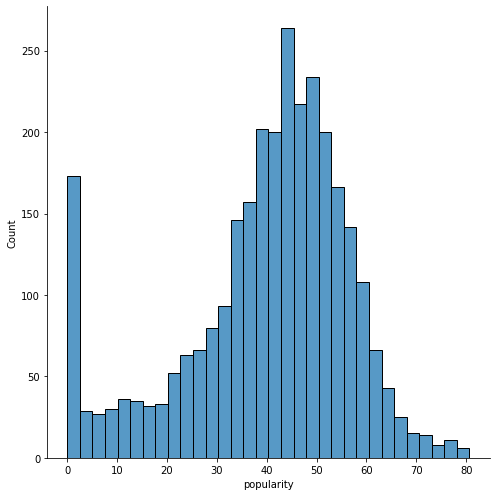

In [58]:
sns.displot(spotify_genres["popularity"], height=7)

In [121]:
spotify_genres = spotify_genres[spotify_genres.popularity > 70];

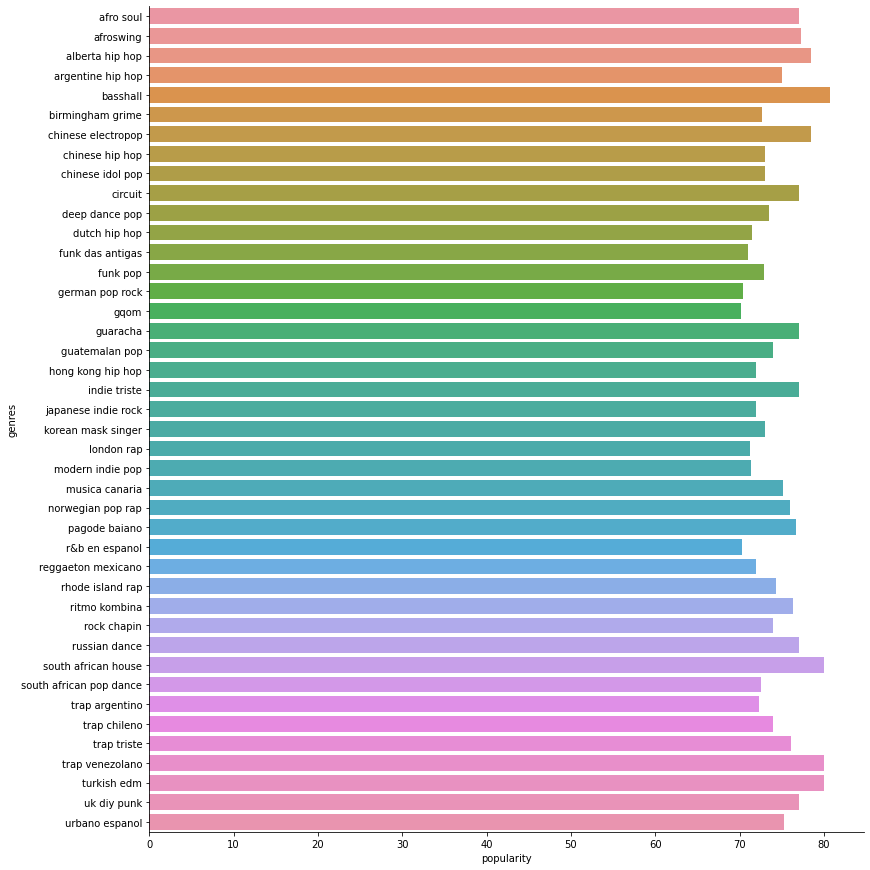

In [86]:
sns.catplot(data=spotify_genres, y="genres", x="popularity", kind="bar", height=12)

## Répartition de la popularité par année

In [122]:
spotify_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


### Tentative non abouti de conversion de int64 en datetime

In [123]:
spotify_by_year["year"]

0     1921
1     1922
2     1923
3     1924
4     1925
      ... 
95    2016
96    2017
97    2018
98    2019
99    2020
Name: year, Length: 100, dtype: int64

In [124]:
spotify_by_year["year"].dtype

dtype('int64')

In [125]:
spotify_by_year["year"] = pd.to_datetime(spotify_by_year['year'], format='%Y').dt.year

In [126]:
pd.to_datetime(spotify_by_year['year'], format='%Y-%m-%d').dt.year

0     1970
1     1970
2     1970
3     1970
4     1970
      ... 
95    1970
96    1970
97    1970
98    1970
99    1970
Name: year, Length: 100, dtype: int64

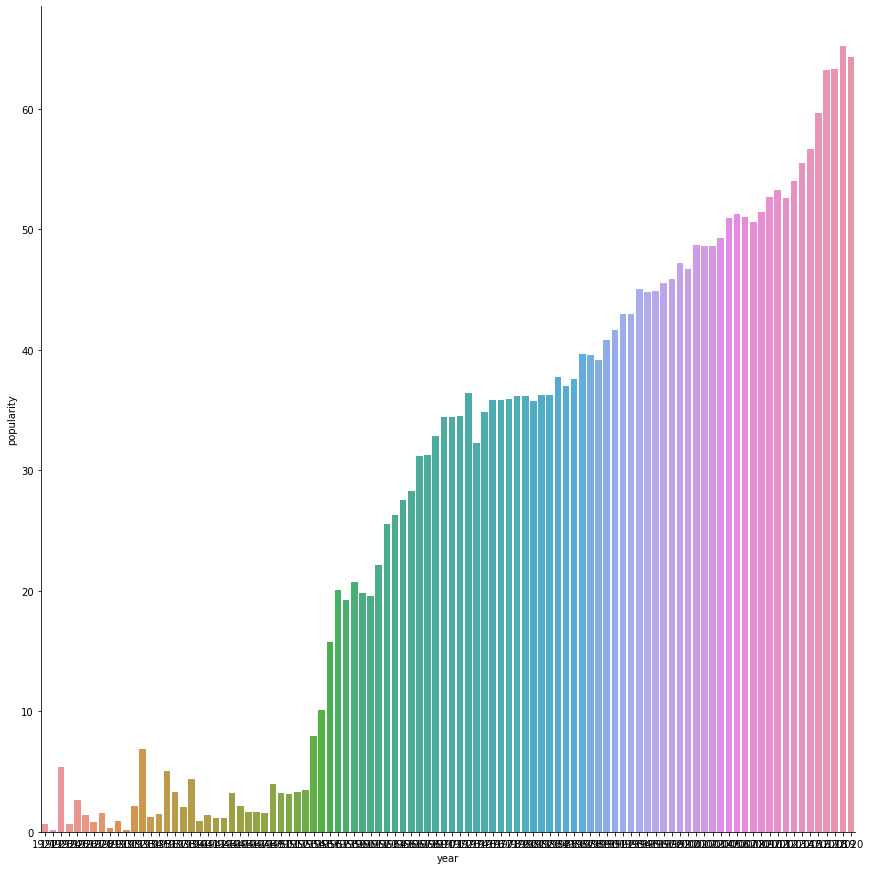

In [86]:
sns.catplot(data=spotify_by_year, y="popularity", x="year", kind="bar", height=12)

Le graphique bien que illisible, on peut y observer en tendance croissante à mesure que l'on se rapproche de 2021.

# Conclusion

À partir des données observées, on pourrait émèttre à l'artiste 'touche à tout' les remarques/ observations suivantes:
- Tendre vers une proposition musicale serai explicite
- De se nourrir d'influences musicales :
    - Pop
    - Hip hop
    - Rap
    - R&B
- Que ses sessions d'écoute afin de nourrir les influences citées au dessus aient un temps d'écoute pouvant se baser sur les années récentes

Je tiens tout de même à sous lignée les faibles corrélations en la popularité et des caractéristiques distincts présentes dans une 

Caractéristiques qui auraient pu agrementer nos observations : 
- Répartion géographique
- Répartition hommes - femmes
- Les intruments, éléments électroniques (basses 808)